# Linear Regression Analysis

## The objective of this analysis is to compare the results of using the Ordinary Least Squares Normal Equation, Batch Gradient Descent, Stochastic Gradient Descent and Sklearn implemented method on Linear Regression

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import timeit

Boston Housing Dataset

In [87]:
from sklearn.datasets import load_boston
dataset=load_boston()

In [90]:
ds = pd.DataFrame(dataset.data, columns=dataset.feature_names)
ds['MEDV'] = dataset.target

In [91]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


No null values to eliminate

In [92]:
ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Plot heatmap based of correlation matrix to choose best the best features

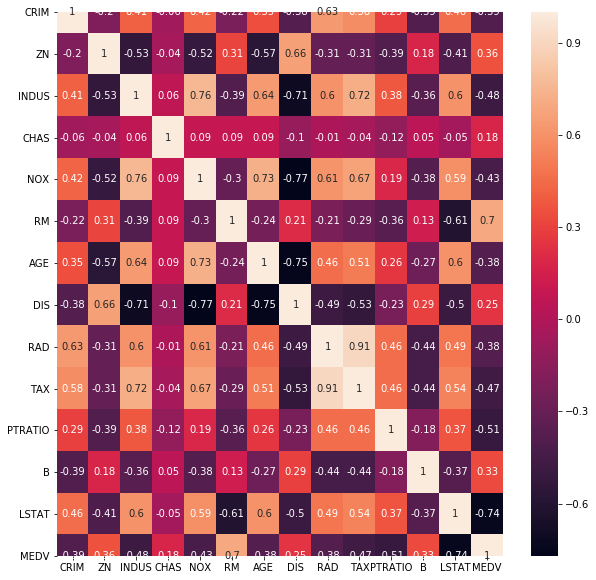

In [94]:
plt.figure(figsize=(10, 10))
corr_matrix = ds.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

## Remove outliers

In [141]:
ds[['RM', 'MEDV']].describe()[1:]

,RM,MEDV
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [167]:
#75% of values of RM are less than 6.28 and 75% of values are less than 25 while max values are 8.78 and 50
#removed outliers
ds = ds[ds.RM < 7.5]
ds = ds[ds.MEDV < 35]
ds[['RM', 'MEDV']].describe()[1:]

,RM,MEDV
mean,6.151206,20.316630
std,0.550540,6.191486
min,3.561000,5.000000
25%,5.871000,16.200000
50%,6.152000,20.400000
75%,6.481000,23.800000
max,7.420000,34.900000


## Simple Linear Regression


### RM was chosen as the feature for the simple linear regression model because of it's high correlation with MEDV(the target value) corr(RM,MEDV)=0.7

In [198]:
#scale values between 0 and 1
def scale(x):
    min = x.min()
    max = x.max()
    return np.array([(i - min)/(max - min) for i in x])



#extract X column from dataframe
rm_values = ds["RM"].to_numpy()
rm_values=scale(rm_values)
rm_values=rm_values.T
#add column of ones because we define our simple linear ref function as h(x)=b*x_0+a*x_1 meaning x_0=1
n=rm_values.size
a=np.ones(n)
X=np.c_[a,rm_values]

Y=ds["MEDV"].to_numpy()
Y=scale(Y)

## Scaled values lead to very low MSE which is hard to compare between models. We revert back to unscaled values for the sake of comparison.

In [208]:
rm_values = ds["RM"].to_numpy()
rm_values=rm_values.T
n=rm_values.size
a=np.ones(n)
X=np.c_[a,rm_values]
Y=ds["MEDV"].to_numpy()


### Linear correlation between RM and target suggest a good fitment for a linear reg model

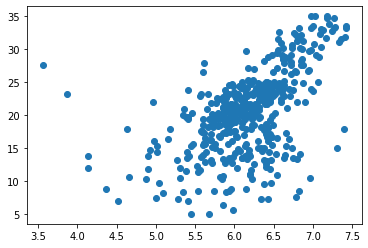

In [209]:
plt.scatter(rm_values,Y)

## Simple Linear Regression using Normal Eq with Least Squares
### Find b_0 and b_1 parameters using expl_1.pdf explanation

In [221]:
start_nr_eq = timeit.timeit()
coeffs_nr_eq= np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
end_nr_eq = timeit.timeit()
print(coeffs_nr_eq)
time_nr_eq=start_nr_eq-end_nr_eq
print(time_nr_eq)

[-17.78849219   6.1947404 ]
0.0009661639996920712


In [211]:
#predict values
Y_pred_nr_eq = np.array([[coeffs_nr_eq[0]+coeffs_nr_eq[1]*rm_values[x]] for x in range(n)])
   

In [282]:
print('Time to complete for Simple Linear Reg using Normal Equation:', time_nr_eq)
print('Parameters for Simple Linear Reg using Normal Equation: ',coeffs_nr_eq)
mse_nr_eq=mean_squared_error(Y, Y_pred_nr_eq)
print('MSE for Simple Linear Reg using Normal Equation:',mse_nr_eq)


Time to complete for Simple Linear Reg using Normal Equation: 0.0009661639996920712
Parameters for Simple Linear Reg using Normal Equation:  [-17.78849219   6.1947404 ]
MSE for Simple Linear Reg using Normal Equation: 26.644893240718407


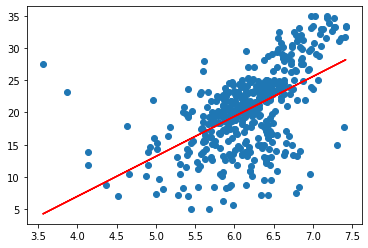

In [218]:
plt.scatter(rm_values,Y)
plt.plot(rm_values,Y_pred_nr_eq,color="red")

## Simple Linear Regression using Gradient Descent
### Find b_0 and b_1 parameters using expl_2.pdf explanation

Time to complete using batch gradient descent: 0.0005386939992604312
Parameters of function:  8.493045704152086 1.9551777763184706
MSE for Batch Gradient Descent:  32.12200926124124


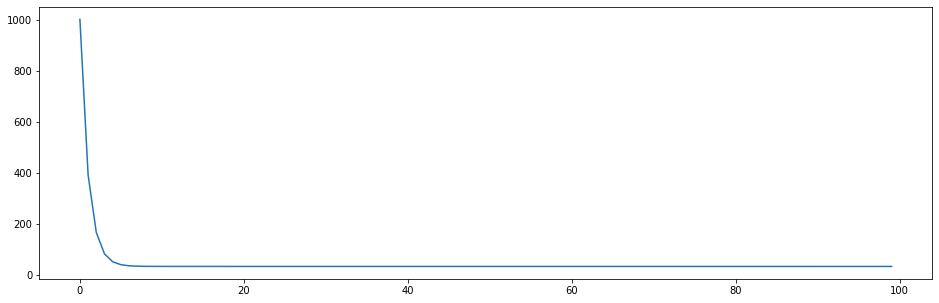

In [340]:
#set lr and number of epochs
lr=0.005
epochs=100

#initialise b_0 and b_1 with 10
b_0=10
b_1=10

#initialize vector to store mse values
mse_batch = []
start_batch=timeit.timeit()
for i in range (epochs):
    y_pred = b_0 + b_1*rm_values
    err = Y - y_pred
    b_1 = b_1 - lr*(-2/n * rm_values.dot(err).sum())
    b_0 = b_0 - lr*(-2/n * err.sum())
    mse_batch.append(mean_squared_error(Y, (b_0 + b_1*rm_values)))
end_batch=timeit.timeit()
time_batch=start_batch-end_batch
print('Time to complete using batch gradient descent:', time_batch)
plt.figure(figsize=(16,5))  
print('Parameters of function: ',b_0,b_1)
plt.plot(range(len(mse_batch)), mse_batch)
print('MSE for Batch Gradient Descent: ', mse_batch[-1])
    

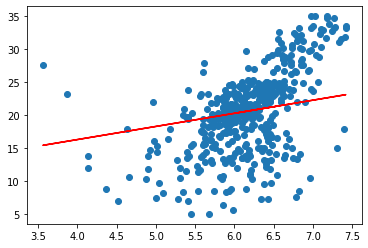

In [331]:
Y_pred_batch = np.array([[b_0+b_1*rm_values[x]] for x in range(n)])
plt.scatter(rm_values,Y)
plt.plot(rm_values,Y_pred_batch,color="red")

## Simple Linear Regression using Stochastic Gradient Descent

Time to complete using stochastic gradient descent: 0.0012546060024760664
Parameters of function:  8.660170152519758 1.7071380923848791
MSE for Stochastic Gradient Descent:  34.070606172956694


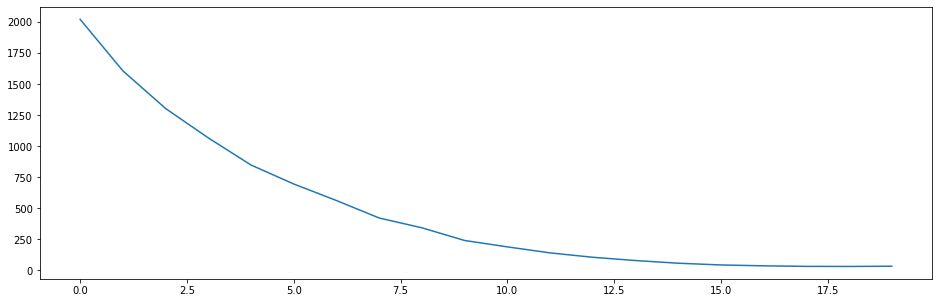

In [328]:
#set lr and number of epochs
lr=0.001
epochs=20

#initialise b_0 and b_1 with 0
b_0=10
b_1=10

#initialize vector to store mse values
mse_stochastic = []
start_stochastic=timeit.timeit()
for i in range (epochs):
    
    #pick random index to choose value for stochastic update
    index= np.random.randint(0, len(rm_values))
    X_stochastic = rm_values[index]
    Y_stochastic = rm_values[index]
    err = Y_stochastic - b_0 - b_1*X_stochastic
    
    b_1 = b_1 - lr*(-2 * X_stochastic*err.sum())
    b_0 = b_0 - lr*(-2 * err.sum())
    
    mse_stochastic.append(mean_squared_error(Y, (b_0 + b_1*rm_values)))
    
end_stochastic=timeit.timeit()
time_batch=start_batch-end_batch
print('Time to complete using stochastic gradient descent:', time_batch)
plt.figure(figsize=(16,5))  
print('Parameters of function: ',b_0,b_1)
plt.plot(range(len(mse_stochastic)), mse_stochastic)
print('MSE for Stochastic Gradient Descent: ', mse_stochastic[-1])

More epochs lead to increased MSE

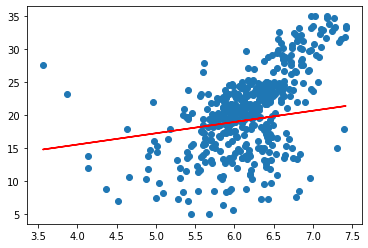

In [329]:
Y_pred_stochastic = np.array([[b_0+b_1*rm_values[x]] for x in range(n)])
plt.scatter(rm_values,Y)
plt.plot(rm_values,Y_pred_stochastic,color="red")

## Simple Linear Regression using Gradient Descent using SKlearn implemented method

In [290]:
start_sk = timeit.timeit()
linear = LinearRegression()
linear.fit(X, Y)
end_sk = timeit.timeit()
time_sk = start_sk-end_sk



In [289]:
prediction=linear.predict(X)
coeffs_linear=np.array([linear.intercept_,linear.coef_[1]])

In [291]:
print('Time for Simple Linear Reg using Sklearn method:', time_sk)
print('Parameters for Simple Linear Ref using Sklearn method:', coeffs_linear)
mse_linear=mean_squared_error(Y, prediction)
print('MSE for Simple Linear Reg using Sklearn method:', mse_linear)

Time for Simple Linear Reg using Sklearn method: 0.0007809640010236762
Parameters for Simple Linear Ref using Sklearn method: [-17.78849219   6.1947404 ]
MSE for Simple Linear Reg using Sklearn method: 26.6448932407184


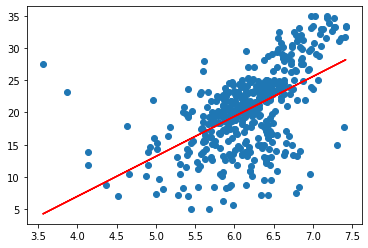

In [292]:
plt.scatter(rm_values,Y)
plt.plot(rm_values,prediction,color="red")

## Key Takeaways

Judging by the results, Sklearn and Normal Equation perform exaclty the same, achieving the same results for the parameters(-17.78, 6.19) in virtually the same time(0.0008 secs). The MSE is at its lowest at 26.68. While this definitely a high value, we also have to the take into consideration the target values. If we were to convert the values to a [0,1] interval, the MSE would be around 0.002. As for the Gradient Descent variants, the Batch version achieves better results than the Stochastic version which is understandable. Stochastic Gradient Descent would never be able to fully converge as it would "hover" around the minimum global point. However, both of them perform worse than the least squares and sklearn methods, with Batch Gradient Descent managing a MSE of around 32 and SGD 34. 
In conclusion, we can assume that LinearRegression uses Least Squares Method for implementing the function.